# Go2-W (Wheel-Leg Hybrid) Robot Simulation

This notebook is specifically for the **Unitree Go2-W** - the wheel-legged hybrid version!

The Go2-W has:
- 16 degrees of freedom (vs 12 on standard Go2)
- Wheel feet for smooth surfaces
- Leg locomotion for rough terrain
- 4D LiDAR (360°×90° coverage)
- 100 TOPS computing (Nvidia Jetson Orin NX)

---

## Method 1: Official Unitree MuJoCo Simulator (Recommended)

This is the official simulator that **supports Go2-W directly**!

### Step 1: Install Dependencies

In [1]:
# Install Python dependencies
!pip install mujoco numpy matplotlib pygame

   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ------------- -------------------------- 1.8/5.5 MB 9.7 MB/s eta 0:00:01
   -------------------------- ------------- 3.7/5.5 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 5.5/5.5 MB 9.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ------- -------------------------------- 2.1/10.6 MB 11.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/10.6 MB 11.7 MB/s eta 0:00:01
   -------------------------- ------------- 7.1/10.6 MB 12.0 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/559.5 kB ? eta -:--:--
   ---------------------------------------- 559.5/559.5 kB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   -------------------

In [2]:
# Clone the official Unitree MuJoCo simulator
!git clone https://github.com/unitreerobotics/unitree_mujoco.git

Cloning into 'unitree_mujoco'...
Updating files:  38% (149/390)
Updating files:  39% (153/390)
Updating files:  40% (156/390)
Updating files:  41% (160/390)
Updating files:  42% (164/390)
Updating files:  43% (168/390)
Updating files:  44% (172/390)
Updating files:  45% (176/390)
Updating files:  46% (180/390)
Updating files:  47% (184/390)
Updating files:  48% (188/390)
Updating files:  49% (192/390)
Updating files:  50% (195/390)
Updating files:  51% (199/390)
Updating files:  52% (203/390)
Updating files:  53% (207/390)
Updating files:  54% (211/390)
Updating files:  55% (215/390)
Updating files:  56% (219/390)
Updating files:  57% (223/390)
Updating files:  58% (227/390)
Updating files:  59% (231/390)
Updating files:  60% (234/390)
Updating files:  61% (238/390)
Updating files:  62% (242/390)
Updating files:  63% (246/390)
Updating files:  64% (250/390)
Updating files:  65% (254/390)
Updating files:  66% (258/390)
Updating files:  67% (262/390)
Updating files:  68% (266/390)
Updati

In [3]:
# Install Unitree SDK2 Python
!git clone https://github.com/unitreerobotics/unitree_sdk2_python.git
!cd unitree_sdk2_python && pip install -e .

Cloning into 'unitree_sdk2_python'...


Obtaining file:///C:/Users/job-j/Documents/GitHub/MakerSpace-Dog-Challenge/unitree_sdk2_python
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      Could not locate cyclonedds. Try to set CYCLONEDDS_HOME or CMAKE_PREFIX_PATH
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


### Step 2: Check Available Robot Models

Let's see what robots are available in the simulator:

In [4]:
import os

# List available robots in unitree_mujoco
robots_dir = 'unitree_mujoco/unitree_robots'

if os.path.exists(robots_dir):
    robots = os.listdir(robots_dir)
    print("Available robot models:")
    for robot in sorted(robots):
        robot_path = os.path.join(robots_dir, robot)
        if os.path.isdir(robot_path):
            # Check for scene.xml
            scene_file = os.path.join(robot_path, 'scene.xml')
            has_scene = '✓' if os.path.exists(scene_file) else '✗'
            print(f"  {has_scene} {robot}")
else:
    print("Please run the git clone cell first!")

Available robot models:
  ✓ b2
  ✓ b2w
  ✓ g1
  ✓ go2
  ✓ go2w
  ✓ h1
  ✓ h1_2


### Step 3: Configure for Go2-W

The simulator config needs to be set to `go2w` (not `go2`):

In [5]:
# Create/update the Python config for Go2-W
config_content = '''
# Configuration for Go2-W (Wheel-Leg Hybrid)

# IMPORTANT: Use "go2w" for the wheel-leg version!
ROBOT = "go2w"  # <-- This is the key difference from standard Go2

# Robot simulation scene file
ROBOT_SCENE = "../unitree_robots/" + ROBOT + "/scene.xml"

# DDS domain id (use 1 for simulation, 0 for real robot)
DOMAIN_ID = 1

# Network interface ("lo" for simulation)
INTERFACE = "lo"

# Print scene information
PRINT_SCENE_INFORMATION = True

# Joystick settings (set to 0 if no gamepad)
USE_JOYSTICK = 0
JOYSTICK_TYPE = "xbox"
JOYSTICK_DEVICE = 0

# Simulation settings
ENABLE_ELASTIC_BAND = False
SIMULATE_DT = 0.003
VIEWER_DT = 0.02
'''

# Write config file
config_path = 'unitree_mujoco/simulate_python/config.py'
if os.path.exists('unitree_mujoco/simulate_python'):
    with open(config_path, 'w') as f:
        f.write(config_content)
    print(f"✓ Config updated for Go2-W at {config_path}")
else:
    print("Please clone unitree_mujoco first!")

✓ Config updated for Go2-W at unitree_mujoco/simulate_python/config.py


### Step 4: Load and View Go2-W Model

Now let's load the actual Go2-W model:

In [6]:
import mujoco
import numpy as np
import matplotlib.pyplot as plt

# Path to Go2-W model
go2w_scene_path = 'unitree_mujoco/unitree_robots/go2w/scene.xml'

# Check if Go2-W model exists
if os.path.exists(go2w_scene_path):
    print(f"✓ Found Go2-W model at: {go2w_scene_path}")
    
    # Load the model
    model = mujoco.MjModel.from_xml_path(go2w_scene_path)
    data = mujoco.MjData(model)
    
    print(f"\n=== Go2-W Model Information ===")
    print(f"Number of joints: {model.njnt}")
    print(f"Number of actuators: {model.nu}")
    print(f"Number of bodies: {model.nbody}")
    print(f"Simulation timestep: {model.opt.timestep} seconds")
else:
    print(f"✗ Go2-W model not found at: {go2w_scene_path}")
    print("\nLet's check what's available:")
    !ls -la unitree_mujoco/unitree_robots/

✓ Found Go2-W model at: unitree_mujoco/unitree_robots/go2w/scene.xml

=== Go2-W Model Information ===
Number of joints: 17
Number of actuators: 16
Number of bodies: 18
Simulation timestep: 0.002 seconds


In [7]:
# Print joint names - Go2-W should have MORE joints than Go2 (wheels!)
print("\n=== Go2-W Joint Names ===")
print("(Note: Go2-W has wheel joints in addition to leg joints)\n")

for i in range(model.njnt):
    name = mujoco.mj_id2name(model, mujoco.mjtObj.mjOBJ_JOINT, i)
    print(f"  Joint {i:2d}: {name}")


=== Go2-W Joint Names ===
(Note: Go2-W has wheel joints in addition to leg joints)

  Joint  0: None
  Joint  1: FL_hip_joint
  Joint  2: FL_thigh_joint
  Joint  3: FL_calf_joint
  Joint  4: FL_wheel_joint
  Joint  5: FR_hip_joint
  Joint  6: FR_thigh_joint
  Joint  7: FR_calf_joint
  Joint  8: FR_wheel_joint
  Joint  9: RL_hip_joint
  Joint 10: RL_thigh_joint
  Joint 11: RL_calf_joint
  Joint 12: RL_wheel_joint
  Joint 13: RR_hip_joint
  Joint 14: RR_thigh_joint
  Joint 15: RR_calf_joint
  Joint 16: RR_wheel_joint


In [8]:
# Print actuator names
print("\n=== Go2-W Actuators ===")
print("(These are the motors you can control)\n")

for i in range(model.nu):
    name = mujoco.mj_id2name(model, mujoco.mjtObj.mjOBJ_ACTUATOR, i)
    print(f"  Actuator {i:2d}: {name}")


=== Go2-W Actuators ===
(These are the motors you can control)

  Actuator  0: FR_hip
  Actuator  1: FR_thigh
  Actuator  2: FR_calf
  Actuator  3: FL_hip
  Actuator  4: FL_thigh
  Actuator  5: FL_calf
  Actuator  6: RR_hip
  Actuator  7: RR_thigh
  Actuator  8: RR_calf
  Actuator  9: RL_hip
  Actuator 10: RL_thigh
  Actuator 11: RL_calf
  Actuator 12: FR_wheel
  Actuator 13: FL_wheel
  Actuator 14: RR_wheel
  Actuator 15: RL_wheel


### Step 5: Render the Go2-W

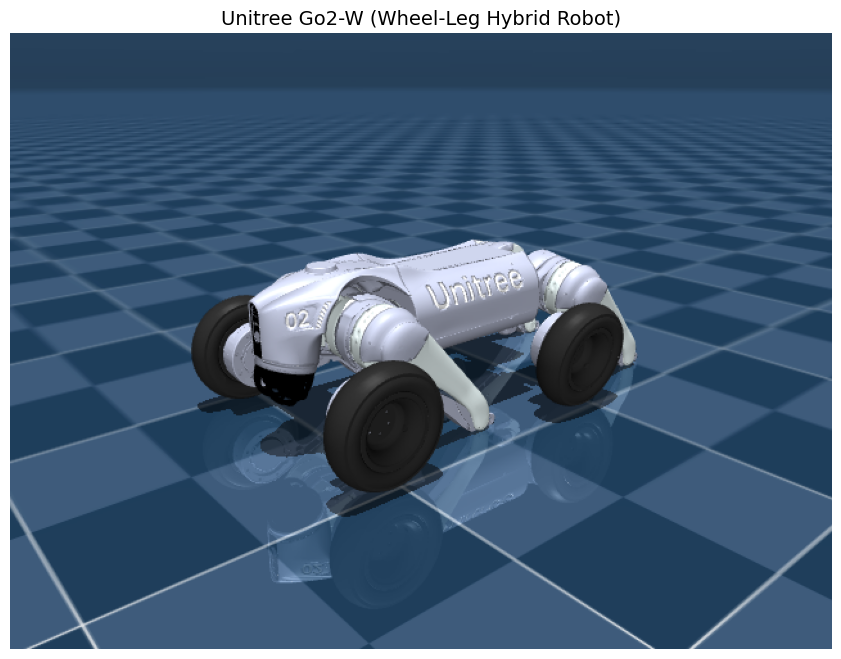


✓ Go2-W loaded successfully!
Notice the WHEELS at the feet - this is what makes it Go2-W!


In [9]:
# Create renderer
renderer = mujoco.Renderer(model, height=480, width=640)

# Reset simulation
mujoco.mj_resetData(model, data)

# Step simulation forward
for _ in range(200):
    mujoco.mj_step(model, data)

# Render
renderer.update_scene(data)
image = renderer.render()

# Display
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.title('Unitree Go2-W (Wheel-Leg Hybrid Robot)', fontsize=14)
plt.show()

print("\n✓ Go2-W loaded successfully!")
print("Notice the WHEELS at the feet - this is what makes it Go2-W!")

### Step 6: Simple Animation - Test the Wheels!

In [10]:
# Reset simulation
mujoco.mj_resetData(model, data)

# Simulation parameters
duration = 3.0  # seconds
framerate = 30

frames = []
sim_time = 0

print("Simulating Go2-W movement...")

while sim_time < duration:
    # Apply simple control
    # Try to make small movements to see the robot
    t = sim_time
    for i in range(min(model.nu, 16)):  # Go2-W has 16 actuators
        data.ctrl[i] = 0.3 * np.sin(2 * np.pi * 0.5 * t + i * 0.3)
    
    # Step simulation
    mujoco.mj_step(model, data)
    sim_time += model.opt.timestep
    
    # Capture frames
    if len(frames) < sim_time * framerate:
        renderer.update_scene(data)
        frames.append(renderer.render().copy())

print(f"Captured {len(frames)} frames")

Simulating Go2-W movement...
Captured 91 frames


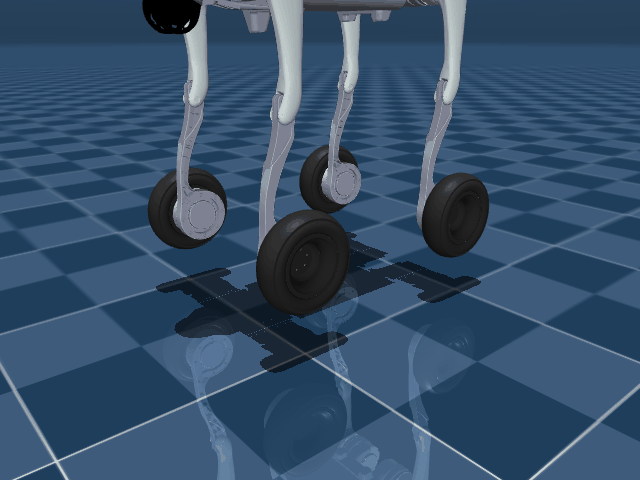

In [12]:
# Create GIF animation (no ffmpeg needed!)
from PIL import Image

# Convert frames to PIL images
pil_frames = [Image.fromarray(frame) for frame in frames]

# Save as GIF
pil_frames[0].save(
    'go2w_animation.gif',
    save_all=True,
    append_images=pil_frames[1:],
    duration=50,  # milliseconds per frame
    loop=0
)

# Display in notebook
from IPython.display import Image as IPImage, display
display(IPImage(filename='go2w_animation.gif'))

GO2PY Code